In [1]:
# importing Required Libraries

import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.utils.vis_utils import plot_model

11501568/11490434 [==============================] - 0s 0us/step


/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

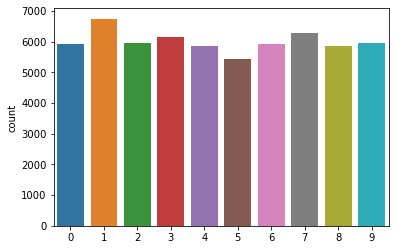

In [2]:
# loading the MNIST dataset

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

sns.countplot(y_train)

In [3]:
input_shape = (28, 28, 1)

x_train=x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_train=x_train / 255.0
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
x_test=x_test/255.0

In [4]:
y_train = tf.one_hot(y_train.astype(np.int32), depth=10)
y_test = tf.one_hot(y_test.astype(np.int32), depth=10)

tf.Tensor([0. 0. 0. 0. 0. 1. 0. 0. 0. 0.], shape=(10,), dtype=float32)


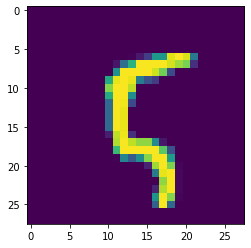

In [5]:
plt.imshow(x_train[100][:,:,0])
print(y_train[100])

In [6]:
X_train_plot = x_train.reshape(-1, 28, 28)

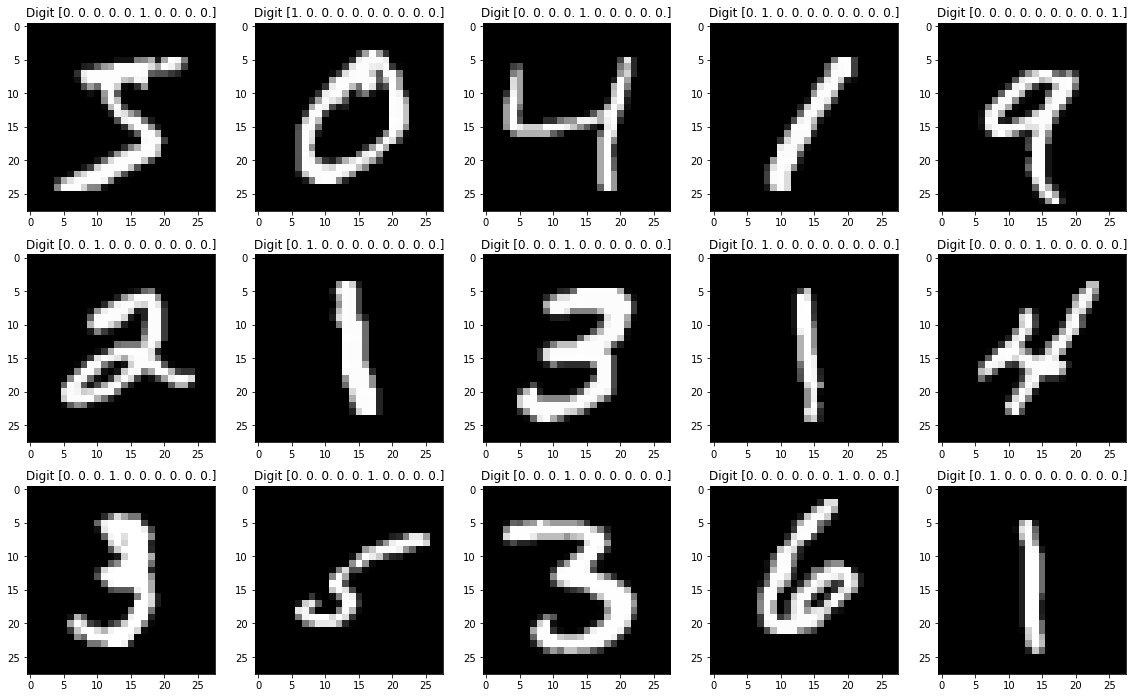

In [7]:
def Show_example_digits(mono = 'gray'):
    fig = plt.figure(figsize = (16, 16))
    for idx in range(15):
        plt.subplot(5, 5,idx+1)
        plt.imshow(X_train_plot[idx], cmap = mono)
        plt.title("Digit {}".format(y_train[idx]))
        
    plt.tight_layout()   
Show_example_digits()

In [8]:
# determine the shape of the input images
inp_shape = x_train.shape[1:]
print(inp_shape)

(28, 28, 1)


In [9]:
batch_size = 64
num_classes = 10
epochs = 10

In [10]:
# defining the model
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32, (5,5), padding='same', activation='relu', input_shape=input_shape),
    tf.keras.layers.Conv2D(32, (5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.RMSprop(epsilon=1e-08), loss='categorical_crossentropy', metrics=['acc'])

In [11]:
# text Description of model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        36928     
                                                        

In [12]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.1)

Epoch 1/10
844/844 [==============================] - 296s 350ms/step - loss: 0.2142 - acc: 0.9331 - val_loss: 0.0371 - val_acc: 0.9895
Epoch 2/10
844/844 [==============================] - 298s 353ms/step - loss: 0.0723 - acc: 0.9789 - val_loss: 0.0300 - val_acc: 0.9920
Epoch 3/10
844/844 [==============================] - 295s 349ms/step - loss: 0.0613 - acc: 0.9831 - val_loss: 0.0293 - val_acc: 0.9915
Epoch 4/10
844/844 [==============================] - 295s 349ms/step - loss: 0.0506 - acc: 0.9854 - val_loss: 0.0310 - val_acc: 0.9933
Epoch 5/10
844/844 [==============================] - 297s 351ms/step - loss: 0.0491 - acc: 0.9863 - val_loss: 0.0301 - val_acc: 0.9927
Epoch 6/10
844/844 [==============================] - 293s 347ms/step - loss: 0.0474 - acc: 0.9876 - val_loss: 0.0408 - val_acc: 0.9915
Epoch 7/10
844/844 [==============================] - 292s 346ms/step - loss: 0.0460 - acc: 0.9874 - val_loss: 0.0332 - val_acc: 0.9927
Epoch 8/10
844/844 [============================

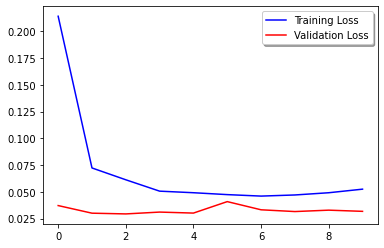

In [13]:
# ploting the learning curves
fig, ax = plt.subplots(1,1)
ax.plot(history.history['loss'], color='b', label="Training Loss")
ax.plot(history.history['val_loss'], color='r', label="Validation Loss")
legend = ax.legend(loc='best', shadow=True)

In [14]:
# evaluate the model
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f'Accuracy: {accuracy*100}')

Accuracy: 99.41999912261963


In [15]:
y_pred = model.predict(x_test)

In [16]:
def draw_output(idx_nums):
    plt.figure(figsize = (20, 20))
    plt.xticks( range(10) )
    x = np.ceil(np.sqrt(len(idx_nums)))
    cnt = 1
    for ph in idx_nums:
        plt.subplot(x, x, cnt)
        curr_photo = y_test[ph]
        
        plt.xlim(0, 10)
        plt.title("Digit: {0}\n idx: {1} ".format(np.argmax(y_test[ph]), ph), fontsize = 10) 
        plt.bar(range(10), y_pred[ph])
        
        cnt += 1

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


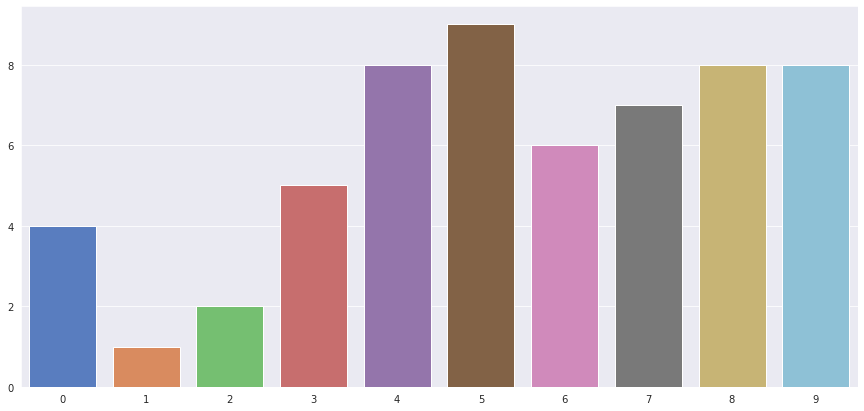

In [17]:
cnt_error = []
for idx, (a, b) in enumerate(zip(y_test, y_pred)):
    if np.argmax(a) == np.argmax(b): continue
    cnt_error.append( (np.argmax(a)) )

cnt_error = np.unique(cnt_error, return_counts = True)
sns.set_style("darkgrid")
plt.figure(figsize = (15, 7))
bar_plot = sns.barplot(cnt_error[0], cnt_error[1], palette="muted")
plt.show()

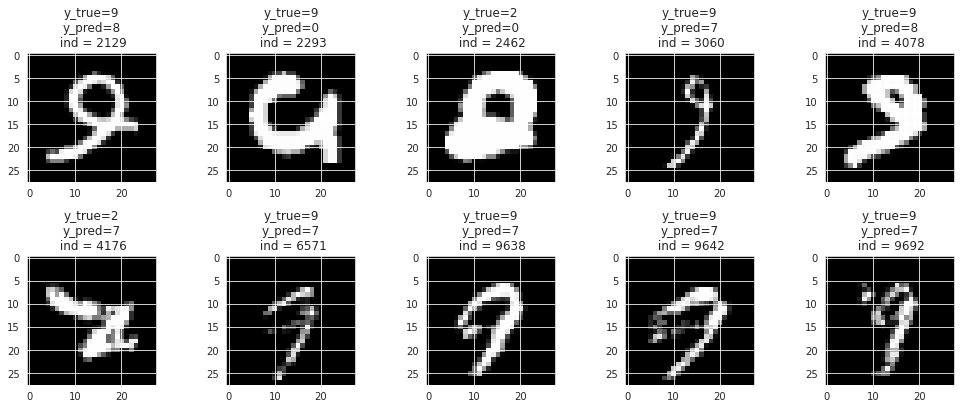

In [18]:
cnt_ind = 1
list_idx = []
X_val_plot = x_test.reshape( x_test.shape[:-1] )
fig = plt.figure(figsize=(14, 14))

for idx, (a, b) in enumerate(zip(y_test, y_pred)):
    if np.argmax(a) == np.argmax(b): continue
    if (np.argmax(a) == 2 or np.argmax(a) == 9):    
        plt.subplot(5, 5, cnt_ind)
        plt.imshow(X_val_plot[idx], cmap='gray', interpolation='none')
        plt.title('y_true={0}\ny_pred={1}\n ind = {2}'.format(np.argmax(a), np.argmax(b), idx))
        plt.tight_layout()
        list_idx.append(idx)
        cnt_ind += 1

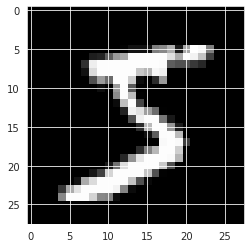

In [19]:
image = x_train[0]
# lets display the image which we want to predict
plt.imshow(np.squeeze(image), cmap='gray')

In [20]:
image.shape[0],image.shape[1],image.shape[2]

(28, 28, 1)

In [21]:
# make a prediction
# reshaping the image for model input
image= image.reshape(1,input_shape[0],input_shape[1],input_shape[2])
# predicting the label of image
yhat = model.predict([image])
print('Predicted: {}'.format(np.argmax(yhat)))

Predicted: 5


In [22]:
# Predict the values from the testing dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert testing observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1)
# compute the confusion matrix
confusion_mtx = tf.math.confusion_matrix(Y_true, Y_pred_classes) 

<AxesSubplot:>

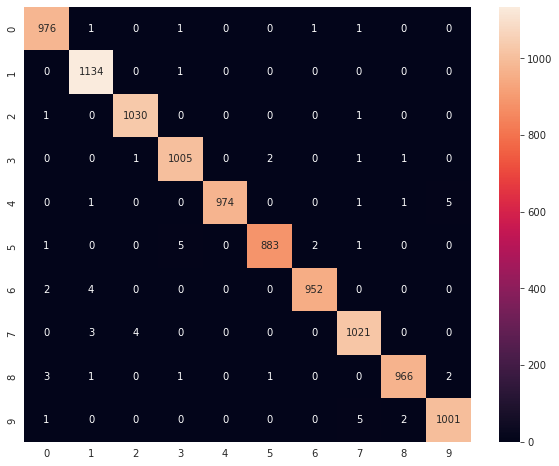

In [23]:
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='g')

In [24]:
model.save('hand_written_digits_CNN.h5')

In [25]:
model = tf.keras.models.load_model('hand_written_digits_CNN.h5')

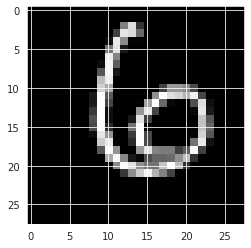

In [26]:
image = x_test[100]
# lets display the image which we want to predict
plt.imshow(np.squeeze(image), cmap='gray')

In [27]:
# make a prediction
# reshaping the image for model input
image= image.reshape(1,input_shape[0],input_shape[1],input_shape[2])
# predicting the label of image
yhat = model.predict([image])
print('Predicted: {}'.format(np.argmax(yhat)))

Predicted: 6


In [28]:
!tar -zcvf model.tgz hand_written_digits_CNN.h5

hand_written_digits_CNN.h5


In [29]:
!pip install watson-machine-learning-client

     |████████████████████████████████| 538 kB 17.4 MB/s eta 0:00:01


In [30]:
!pip install ibm_watson_machine_learning

In [31]:
from ibm_watson_machine_learning import APIClient
wml_credentials = {
    "url":"https://jp-tok.ml.cloud.ibm.com",
    "apikey":"k5bkHHLKz8-cE5kUGr96EFlmc1_Sg8lzjP6ycSc4rrP2"
}
client = APIClient(wml_credentials)
client

In [32]:
client.spaces.get_details()

{'resources': []}